# 8 Modules differentiation
**Datatype are text files with the ID of the genes**

Made by: Cynthia Soto <br>
Date: June 18th, 2021 <br>
Last md: June 21st 2021 <br>

**Assumptions:** <br>
Exist at least 2 folders < control & infected > containing genetic modules (files) with the genes identiers. <br>

1. Parse each infected module against all the control modules <br>
2. Get de arithmetic difference.  <br> 
3. Calculate the percentual representation of the infected module in the control one.  <br>
4. Plot some stats to explaint the work done.  <br>

In [1]:
import os
# ^^^ pyforest auto-imports - don't write above this line
#from pyforest import *  # import the 40 most popular libraries to your notebook
# to see the available libraries 
# lazy_imports()

# Set some initial configuration 
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('precision', 2)
#%precision %.2f

In [2]:
os.getcwd()

<IPython.core.display.Javascript object>

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/notebooks'

In [3]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("../results-data/wgcna")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna


### Folders with modules identify in wgcna

In [4]:
# Check the available folders with genetic modules
import glob
## check a bit of the files to be processed ... are they ok?
s_path = str(os.getcwd()+'/Athal*') 
all_files = glob.glob(s_path)
for file in all_files:
    print(file)

<IPython.core.display.Javascript object>

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_mods_merged_MatrixD
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_mods_MatrixD
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_MatrixE


### Function declaration

In [5]:
def load_ctl_mod_to_compare(s_mod_name):
    # Create a set of the module in control required
    # IN:     @ s_mod_name: name of the file containing the gene list
    # OUT:    @ set_gene_ctrl: a set containing the unique genes to be compared 
    mod = '../Athal_healthy_mods_merged_MatrixD/'+ s_mod_name
    df1 = pd.read_csv(mod, header=None)    ## nrows=100, usecols=[0,1]
    gene_inf_lst = df1[0].tolist()
    set_gene_ctrl = set(gene_inf_lst)
    #print(set_gene_ctrl)
    return set_gene_ctrl

### Modules comparitions

#### Check the number of modules in the infected dataset to be compared 

In [6]:
os.chdir("Athal_infected_mods_merged_MatrixE")
dirListing_inf = os.listdir(str(os.getcwd()))
print("Number of modules in infected dataset:" + str(len(dirListing_inf)))
path_files = os.getcwd()
print(path_files)
dirListing_inf[0:5]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of modules in infected dataset:35


<IPython.core.display.Javascript object>

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE


['mod_merged_tomato2.txt',
 'mod_merged_chocolate.txt',
 'mod_merged_indianred.txt',
 'mod_merged_bisque4.txt',
 'mod_merged_blue2.txt']

#### Create a list with the module's names (control)  to be parsed in recursive mode 

In [7]:
os.chdir("../Athal_healthy_mods_merged_MatrixD")
print("Directory changed:", os.getcwd() )
# First check the number of modules to compare 
dirListing_ctl = os.listdir(str(os.getcwd()))
i_mods_to_parse = len(dirListing_ctl)
print("Number of modules in ctrl:" + str(i_mods_to_parse))

# Second check the name of the modules
s_path = str(os.getcwd()+'/*') 
path_files_ctrl = glob.glob(s_path)
#print("Path file control:", path_files_ctrl)

#Create the lst of the modules to parse in recursive mode
lst_mods_ctrl=[]
for file in path_files_ctrl:
    #print(os.path.basename(file))
    lst_mods_ctrl.append(os.path.basename(file))
print(lst_mods_ctrl[0:5])
i_mods_to_parse = len(lst_mods_ctrl)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_mods_merged_MatrixD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of modules in ctrl:23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['mod_merged_brown3.txt', 'mod_merged_navajowhite1.txt', 'mod_merged_mediumpurple3.txt', 'mod_merged_firebrick2.txt', 'mod_merged_deepskyblue.txt']


### Parse each infected module across all the the control modules stored in the lst_mods_ctrl variable
#### I built a dictionary to save the result comparitions

In [40]:
#### 
my_dict={}
x = 1
y = 1 # for assing unique keys to the dict

os.chdir("../Athal_infected_mods_merged_MatrixE")
print(os.getcwd())
for file in dirListing_inf:    # Repeat for each infected module
    print(file)
    # Prepare first set to be compared
    df1 = pd.read_csv(file, header=None)    ## nrows=100, usecols=[0,1]
    gene_list = df1[0].tolist()
    # Get a unique set of genes from the specific infected module
    uniqueGenes_inf = set(gene_list)
    #print(uniqueGenes_inf)
    mod_inf_name = str(os.path.basename(file))
    mod_inf_name_lng = len(uniqueGenes_inf)
    print("Set " + str(x) + ": " + mod_inf_name + ' have ' + str(mod_inf_name_lng) + ' unique genes')
   
    ##################################
    # Parse the specific infected set (module) against all the ctrl modules to get percentual diference
    # Set in the folder <<control>> because of is the one to be parsed 
    os.chdir("../Athal_healthy_mods_merged_MatrixD")
    for i in range (i_mods_to_parse):  #i_mods_to_parse
        mod_name = lst_mods_ctrl[i]
        #print("Ctrl mod: ", mod_name)
        #call the function that load the control module to be compared
        uniqueGenes_ctr = load_ctl_mod_to_compare(mod_name)
        dif_AB = len(uniqueGenes_inf - uniqueGenes_ctr)   
        if mod_inf_name_lng == dif_AB:
            PercDif_AB = 100
        else :
            PercDif_AB = (100 * dif_AB) / mod_inf_name_lng
        # mod_inf_name, mod_inf_name_lng, 
        mod_ctl_name_lng = len(uniqueGenes_ctr)
        #print(mod_name, '\t', mod_ctl_name_lng,'\t',dif_AB,'\t', PercDif_AB)
        # Insert the comparitions into a dicitonary for further analysis
        print(y)
        my_dict[y] = {}
        my_dict[y]['Mod_Inf'] = mod_inf_name.rsplit( ".", 1 )[ 0 ] 
        my_dict[y]['Mod_Lng_Inf'] = mod_inf_name_lng
        my_dict[y]['Mod_Ctl'] = mod_name.rsplit(".",1)[0]
        my_dict[y]['Mod_Lng_Ctl'] = mod_ctl_name_lng
        my_dict[y]['Genes_diff'] = dif_AB
        my_dict[y]['Perc_diff']= PercDif_AB
        y = y+1
    ################################## 
    
    # Now change the directory bacause of another module of infected is going to be read
    os.chdir("../Athal_infected_mods_merged_MatrixE")
    #x = x + 1    # to escape in the first infected mod
    #if x > 3: break
#print(my_dict)              
print("done")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE
mod_merged_tomato2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_tomato2.txt have 218 unique genes


<IPython.core.display.Javascript object>

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


<IPython.core.display.Javascript object>

mod_merged_chocolate.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_chocolate.txt have 818 unique genes


<IPython.core.display.Javascript object>

24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


<IPython.core.display.Javascript object>

mod_merged_indianred.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_indianred.txt have 160 unique genes


<IPython.core.display.Javascript object>

47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


<IPython.core.display.Javascript object>

mod_merged_bisque4.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_bisque4.txt have 115 unique genes


<IPython.core.display.Javascript object>

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


<IPython.core.display.Javascript object>

mod_merged_blue2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_blue2.txt have 416 unique genes


<IPython.core.display.Javascript object>

93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


<IPython.core.display.Javascript object>

mod_merged_firebrick2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_firebrick2.txt have 304 unique genes


<IPython.core.display.Javascript object>

116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138


<IPython.core.display.Javascript object>

mod_merged_deepskyblue.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_deepskyblue.txt have 39 unique genes


<IPython.core.display.Javascript object>

139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161


<IPython.core.display.Javascript object>

mod_merged_dodgerblue1.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_dodgerblue1.txt have 72 unique genes


<IPython.core.display.Javascript object>

162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184


<IPython.core.display.Javascript object>

mod_merged_green.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_green.txt have 236 unique genes


<IPython.core.display.Javascript object>

185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


<IPython.core.display.Javascript object>

mod_merged_tan3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_tan3.txt have 189 unique genes


<IPython.core.display.Javascript object>

208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230


<IPython.core.display.Javascript object>

mod_merged_lightblue2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_lightblue2.txt have 196 unique genes


<IPython.core.display.Javascript object>

231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253


<IPython.core.display.Javascript object>

mod_merged_lavender.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_lavender.txt have 99 unique genes


<IPython.core.display.Javascript object>

254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


<IPython.core.display.Javascript object>

mod_merged_coral4.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_coral4.txt have 98 unique genes


<IPython.core.display.Javascript object>

277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299


<IPython.core.display.Javascript object>

mod_merged_skyblue4.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_skyblue4.txt have 309 unique genes


<IPython.core.display.Javascript object>

300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322


<IPython.core.display.Javascript object>

mod_merged_burlywood.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_burlywood.txt have 39 unique genes


<IPython.core.display.Javascript object>

323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345


<IPython.core.display.Javascript object>

mod_merged_darkmagenta.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_darkmagenta.txt have 133 unique genes


<IPython.core.display.Javascript object>

346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368


<IPython.core.display.Javascript object>

mod_merged_lemonchiffon3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_lemonchiffon3.txt have 1589 unique genes


<IPython.core.display.Javascript object>

369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391


<IPython.core.display.Javascript object>

mod_merged_palevioletred3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_palevioletred3.txt have 62 unique genes


<IPython.core.display.Javascript object>

392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414


<IPython.core.display.Javascript object>

mod_merged_cornsilk2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_cornsilk2.txt have 267 unique genes


<IPython.core.display.Javascript object>

415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437


<IPython.core.display.Javascript object>

mod_merged_lightsteelblue.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_lightsteelblue.txt have 540 unique genes


<IPython.core.display.Javascript object>

438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460


<IPython.core.display.Javascript object>

mod_merged_darkolivegreen2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_darkolivegreen2.txt have 256 unique genes


<IPython.core.display.Javascript object>

461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483


<IPython.core.display.Javascript object>

mod_merged_hotpink3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_hotpink3.txt have 1098 unique genes


<IPython.core.display.Javascript object>

484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506


<IPython.core.display.Javascript object>

mod_merged_antiquewhite.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_antiquewhite.txt have 135 unique genes


<IPython.core.display.Javascript object>

507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529


<IPython.core.display.Javascript object>

mod_merged_darkolivegreen4.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_darkolivegreen4.txt have 597 unique genes


<IPython.core.display.Javascript object>

530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552


<IPython.core.display.Javascript object>

mod_merged_green1.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_green1.txt have 1429 unique genes


<IPython.core.display.Javascript object>

553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575


<IPython.core.display.Javascript object>

mod_merged_mediumpurple1.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_mediumpurple1.txt have 189 unique genes


<IPython.core.display.Javascript object>

576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598


<IPython.core.display.Javascript object>

mod_merged_palevioletred1.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_palevioletred1.txt have 368 unique genes


<IPython.core.display.Javascript object>

599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621


<IPython.core.display.Javascript object>

mod_merged_chocolate2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_chocolate2.txt have 573 unique genes


<IPython.core.display.Javascript object>

622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644


<IPython.core.display.Javascript object>

mod_merged_thistle1.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_thistle1.txt have 190 unique genes


<IPython.core.display.Javascript object>

645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667


<IPython.core.display.Javascript object>

mod_merged_green3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_green3.txt have 472 unique genes


<IPython.core.display.Javascript object>

668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690


<IPython.core.display.Javascript object>

mod_merged_dodgerblue4.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_dodgerblue4.txt have 592 unique genes


<IPython.core.display.Javascript object>

691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713


<IPython.core.display.Javascript object>

mod_merged_mistyrose3.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_mistyrose3.txt have 386 unique genes


<IPython.core.display.Javascript object>

714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736


<IPython.core.display.Javascript object>

mod_merged_steelblue.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_steelblue.txt have 222 unique genes


<IPython.core.display.Javascript object>

737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759


<IPython.core.display.Javascript object>

mod_merged_brown2.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_brown2.txt have 261 unique genes


<IPython.core.display.Javascript object>

760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782


<IPython.core.display.Javascript object>

mod_merged_oldlace.txt


<IPython.core.display.Javascript object>

Set 1: mod_merged_oldlace.txt have 1087 unique genes


<IPython.core.display.Javascript object>

783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805


<IPython.core.display.Javascript object>

done


In [41]:
my_dict[1]
my_dict[1]['Perc_diff']

100

In [42]:
import pandas as pd
   
# Creates padas DataFrame by passing 
# Lists of dictionaries and row index.
df = pd.DataFrame(my_dict, index =['Mod_Inf','Mod_Lng_Inf','Mod_Ctl','Mod_Lng_Ctl','Genes_diff','Perc_diff'])
  
# Print the data
df

,1,2,3,4,5,6,7,8,9,10,...,796,797,798,799,800,801,802,803,804,805
Mod_Inf,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,...,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace
Mod_Lng_Inf,218,218,218,218,218,218,218,218,218,218,...,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
Mod_Ctl,mod_merged_brown3,mod_merged_navajowhite1,mod_merged_mediumpurple3,mod_merged_firebrick2,mod_merged_deepskyblue,mod_merged_lightblue,mod_merged_tan1,mod_merged_antiquewhite3,mod_merged_coral3,mod_merged_darkolivegreen2,...,mod_merged_coral1,mod_merged_darkolivegreen4,mod_merged_mediumpurple1,mod_merged_navajowhite3,mod_merged_lightblue1,mod_merged_thistle1,mod_merged_blue3,mod_merged_honeydew1,mod_merged_mistyrose3,mod_merged_firebrick3
Mod_Lng_Ctl,39,87,109,210,834,635,33,764,2024,1175,...,141,1792,273,492,195,273,79,1047,33,1215
Genes_diff,218,218,218,216,214,206,218,217,180,181,...,1084,1053,1087,1060,1084,1087,1086,1062,1086,936
Perc_diff,100,100,100,99,98,94,100,1e+02,83,83,...,1e+02,97,100,98,1e+02,100,1e+02,98,1e+02,86


In [43]:
df_comp = df.T
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_tomato2,218,mod_merged_brown3,39,218,100
2,mod_merged_tomato2,218,mod_merged_navajowhite1,87,218,100
3,mod_merged_tomato2,218,mod_merged_mediumpurple3,109,218,100


In [47]:
#df_comp
# selecting rows based on condition 
df_comp.to_csv("../modules_comparition.csv", sep=",", header=True)
df_plt = df_comp

In [45]:
# # I kept the cases where the infected modules are different in >80%
# df_plt = df_comp[df_comp['Perc_diff'] < 100]

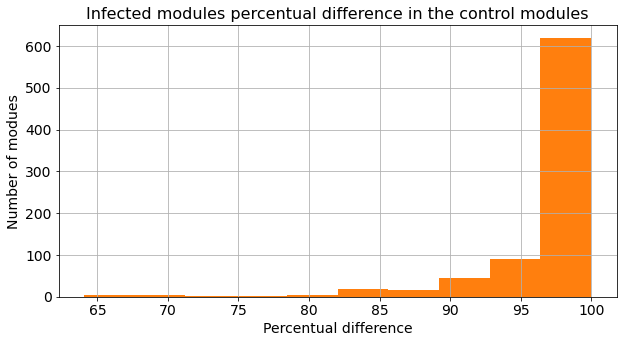

In [49]:
df_plt[["Perc_diff"]] = df_plt[["Perc_diff"]].apply(pd.to_numeric)
#df_plt.hist(by='Mod_Inf',column='Perc_diff')
df_plt.hist(figsize=(10,5), grid=True,  color="C1")
plt.title("Infected modules percentual difference in the control modules",fontsize=16);
plt.xlabel('Percentual difference',fontsize=14);
plt.xticks(fontsize=14);
plt.ylabel('Number of modues',fontsize=14);
plt.yticks(fontsize=14);


In [77]:
# I kept the cases where the infected modules are different at 100%
df_comp = df_comp[df_comp['Perc_diff'] == 100]
print(str(len(df_comp)))
df_comp.head(5)
df_comp.to_csv("../modules_comparition100.csv", sep=",", header=True)

240


In [78]:
# selecting rows based on condition 
df_diff100 = df_comp[df_comp['Perc_diff'] == 100]
len(df_diff100)
#df_plt = df_diff100.head(n=30)
df_plt = df_diff100.sample(frac=0.50)
df_plt.head(5)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
244,mod_merged_lightblue2,196,mod_merged_coral1,141,196,100.0
522,mod_merged_antiquewhite,135,mod_merged_mediumpurple1,273,135,100.0
95,mod_merged_blue2,416,mod_merged_mediumpurple3,109,416,100.0
674,mod_merged_green3,472,mod_merged_tan1,33,472,100.0
589,mod_merged_mediumpurple1,189,mod_merged_coral1,141,189,100.0


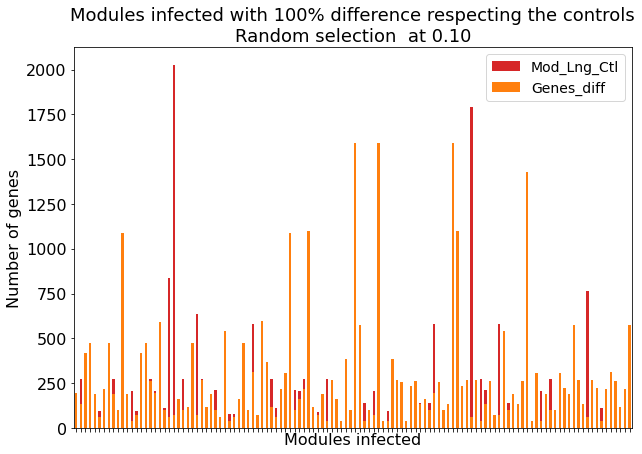

In [79]:
ax = df_plt.plot(x="Mod_Inf", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C3")
#df_plt.plot(x="Mod_Inf", y="Mod_Lng_Inf", kind="bar", ax=ax, color="C2")
df_plt.plot(x="Mod_Inf", y="Genes_diff", kind="bar", ax=ax, color="C1")
#df.plot(x="Mod_Inf", y="25%", kind="bar", ax=ax, color="C4")
plt.title("Modules infected with 100% difference respecting the controls\nRandom selection  at 0.10",fontsize=18);
plt.xlabel('Modules infected',fontsize=16);
#plt.xticks(rotation=55,fontsize=14);
plt.xticks(visible=False)
plt.ylabel('Number of genes',fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=14);

#### Parse specific interation modules

In [11]:
# for m_id, m_info in my_dict.items():
#     #print("\nModule_Name:", m_id)
#     print(m_id)    
#     for key in m_info:
#         #print(key + ':', m_info[key])
#         print(m_info[key])

In [12]:
# pd.concat({
#         k: pd.DataFrame.from_dict(v, 'index') for k, v in my_dict.items()
#     }, 
#     axis=0)